## Time to get your hands dirty. Handwritten digits.

Sometimes you might want to apply multiple ML techniques. For example, just because you have labels in your training data doesn't mean that a regression algorithm will work very well.  So, you might want to start with a clustering or dimensional reduction algorithm first.

Here we're going to use the [MNIST database](https://en.wikipedia.org/wiki/MNIST_database). This contains a set of images with handwritten digts. It is one of the most widely used and best studied datasets in the whole of machine learning. It's part of the standard tests new tecniques need to face. 

### Tasks. Part 0.

1) First thing, grab a piece of paper and visually classify those 25 digits. We'll see if you're better or worse than a computer! 

**Spoiler alert: Davide's efficiency was ~80%, much worse than ML!**


2) Here is how you plot the images and the corresponding labels  (The one thing I'm not telling you of course is the random seed I used to select those above). After you've seen this ones, go back to your piece of paper and update your choices if you want. Keep track of both set of preditions. This is like supervised learning.  

### Tasks. Part 1. Unsupervised Learning: Dimensionality Reduction on Digits

We'd like to visualize our points within the 64-dimensional parameter space, but it's difficult to plot points in $N=64$ dimensions! So we need to reduce the dimensionality of the space


3) Use the unsupervised dimensionality reduction technique called **[`Isomap`](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html#sklearn.manifold.Isomap)**. Isomap is an embedding tecnique, which tries to understand if your $N$ dimensional datapoint live in a $N$ dimensional (with $N<M$) manyfold. Have a look at the Isomap documentation and reduce the MINST dataset.  Do some plots to visualize your results.

### Tasks. Part 2. Supervised Learning: Classification on Digits

Now we want to classify the dataset. 

4) Split the dataset taking 80% of the images as tranining dataset and leaving the other 20% as a validation set. You need `sklearn.model_selection.train_test_split`.

5) Use a simple [`Logistic Regression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) which despite its name is a common classification algorithm. (I know, this is confusing!). Use the flag `solver='sag'` (I found the default solver had a bug, at least when I tried).

6) Compute the accuracy (`sklearn.metrics.accuracy_score`) of your emulator. In this context, accuracy is simply the fraction of the digits that were correctly identified. Compute the accuracy on both the training and the validation set. Comment on the results.

7) The accuracy is a single number doesn't tell us ***where*** we've gone wrong. Plot the ***confusion matrix*** as we did above. What are the digits that are more challenging to identify, does it make sense?


There are many ways to improve this classifier, for example using a more sophisticated model, use cross validation, etc.  We'll get to those in the coming weeks.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.manifold import Isomap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

### 1. Reading Data

In [2]:
digits = datasets.load_digits()
print(digits.images.shape)
print(digits.keys())

(1797, 8, 8)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


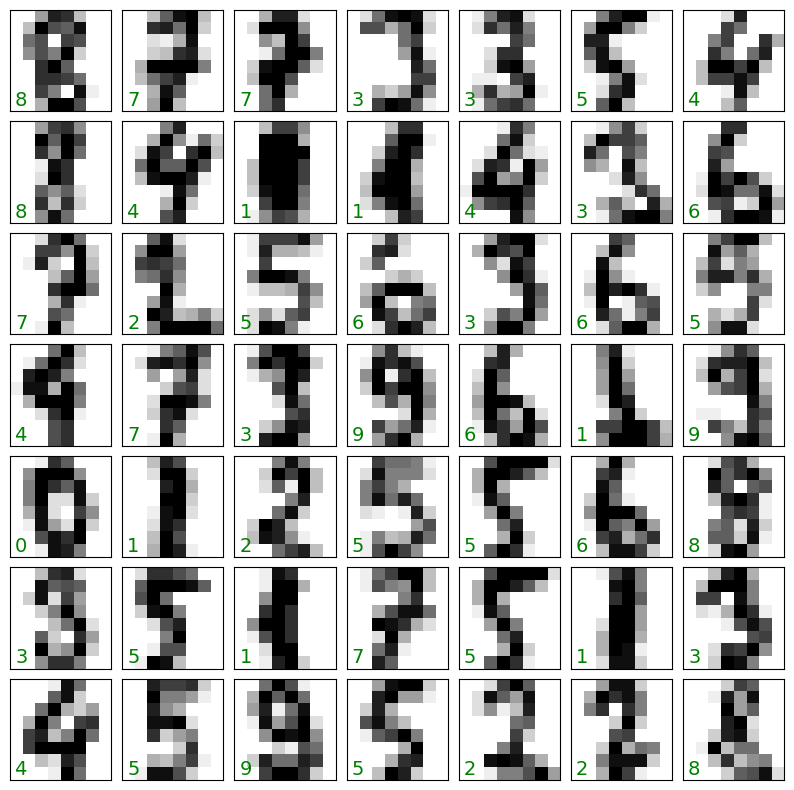

In [3]:
fig, axes = plt.subplots(7,7, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

np.random.seed(0)
mychoices = np.random.choice(digits.images.shape[0],100)

for i, ax in enumerate(axes.flat):
    ax.imshow((digits.images[mychoices[i]]), 
              cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[mychoices[i]]),transform=ax.transAxes, color='green', fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])
    

### ISOMAP - 2 Components

In [4]:
embedding = Isomap(n_components=2)
digits_transformed = embedding.fit_transform(digits.data)
print(digits.data.shape,digits_transformed.shape)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\hp\anaconda3\Lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 64) (1797, 2)


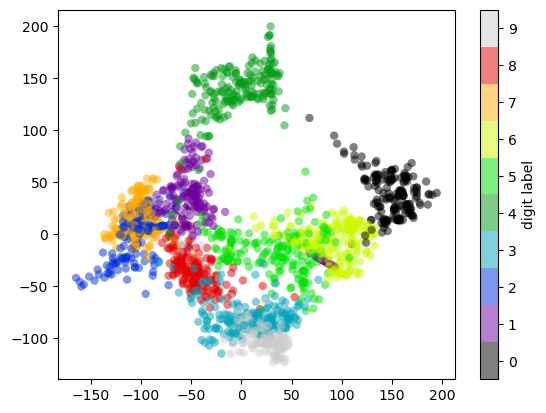

In [5]:
#From: https://gist.github.com/jakevdp/91077b0cae40f8f8244a
def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.colormaps[base_cmap]
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)


# Plot all of the data points in the two projected dimensions.  
# Color the points by their labels.
plt.scatter(digits_transformed[:,0], digits_transformed[:,1], 
            c=digits.target, edgecolor='none', alpha=0.5, 
            cmap=discrete_cmap(10,'nipy_spectral'));

# Add the color bar
plt.colorbar(label='digit label', ticks=range(10))

# Make it clear which color goes with which label
plt.clim(-0.5, 9.5)

Splitting dataset in training and testing subsets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(digits_transformed, digits.target, train_size=0.8, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1437, 2) (360, 2) (1437,) (360,)


In [7]:
clf = LogisticRegression(penalty='l2', solver ='sag', max_iter = 10000).fit(X_train, y_train)

In [8]:
accuracy = accuracy_score(y_test, clf.predict(X_test))
print(accuracy)

0.6527777777777778


In [9]:
def plot_cm(labels, predictions):
  cm = confusion_matrix(labels, predictions)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix')
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

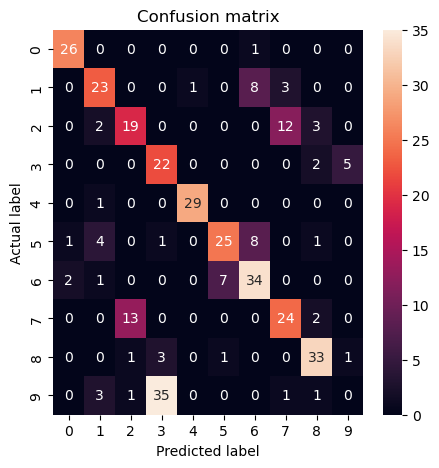

In [10]:
plot_cm(y_test, clf.predict(X_test))

### ISOMAP - More components

The confusion matrix shows that the model has still problems with some pairs of digits. We can obtain a better accuracy with an Isomap with more components.

In [11]:
embedding = Isomap(n_components=25)
digits_transformed = embedding.fit_transform(digits.data)
print(digits.data.shape,digits_transformed.shape)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\hp\anaconda3\Lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 64) (1797, 25)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(digits_transformed, digits.target, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1437, 25) (360, 25) (1437,) (360,)


In [13]:
clf = LogisticRegression(solver ='sag', max_iter = 2000).fit(X_train, y_train)

In [14]:
accuracy = accuracy_score(y_test, clf.predict(X_test))
print(accuracy)

0.9861111111111112


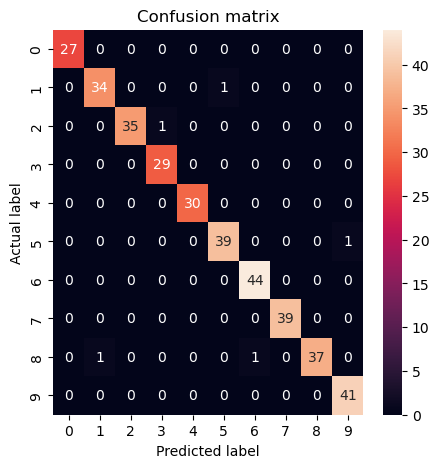

In [15]:
plot_cm(y_test, clf.predict(X_test))

With 25 components, we predictly almost all the testing subset correctly. There is some difficulty in the following pairs:
- 1 predicted as 5
- 2 predicted as 3
- 5 predicted as 9
- 8 predicted as both 1 or 6